In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [2]:
data = pd.read_csv('../data/data_cleaned.csv')
data.columns

Index(['age', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [3]:
# drop duration column
data = data.drop(columns=['duration'])

### Stratify

In [4]:
# calculate distribution of y

value_counts = data['y'].value_counts()
total = value_counts.sum()
percentages = (value_counts / total) * 100
print("Counts:\n", value_counts)
print("\nPercentages:\n", percentages)


Counts:
 y
0    32380
1     2539
Name: count, dtype: int64

Percentages:
 y
0    92.728887
1     7.271113
Name: count, dtype: float64


In [5]:
# uniform the y distribution
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(data.drop(columns='y'),data['y'])

In [6]:
value_counts = y_balanced.value_counts()
total = value_counts.sum()
percentages = (value_counts / total) * 100
print("Counts:\n", value_counts)
print("\nPercentages:\n", percentages)

Counts:
 y
0    32380
1    32380
Name: count, dtype: int64

Percentages:
 y
0    50.0
1    50.0
Name: count, dtype: float64


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)

### Naive Bayes Classifier

In [8]:
# train with Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()


Test Accuracy: 0.7069178505250154
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.88      0.75      6476
           1       0.81      0.54      0.65      6476

    accuracy                           0.71     12952
   macro avg       0.73      0.71      0.70     12952
weighted avg       0.73      0.71      0.70     12952

ROC AUC Score: 0.7874321722320758

Confusion Matrix:
[[5676  800]
 [2996 3480]]


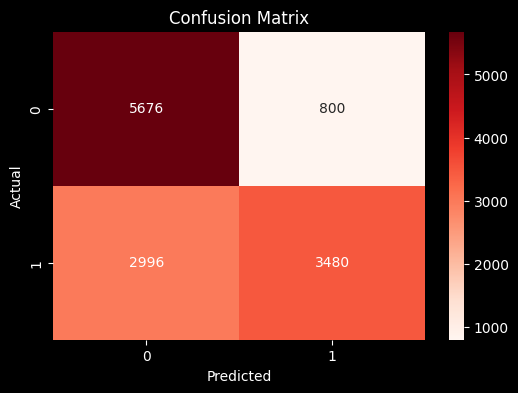

In [9]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, auc, RocCurveDisplay
import seaborn as sns


# predict on test set
y_predNB = model.predict(X_test)

# test accuracy
test_accuracy = accuracy_score(y_test, y_predNB)
print("\nTest Accuracy:", test_accuracy)

# model evaluation
print("Classification Report:\n", classification_report(y_test, y_predNB))
print("ROC AUC Score:",  roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_predNB))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_predNB), annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Classifier

In [10]:
# train with Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)


Test Accuracy: 0.9534434836318715
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      6476
           1       0.95      0.96      0.95      6476

    accuracy                           0.95     12952
   macro avg       0.95      0.95      0.95     12952
weighted avg       0.95      0.95      0.95     12952

ROC AUC Score: 0.9905010007969751

Confusion Matrix:
[[6152  324]
 [ 279 6197]]


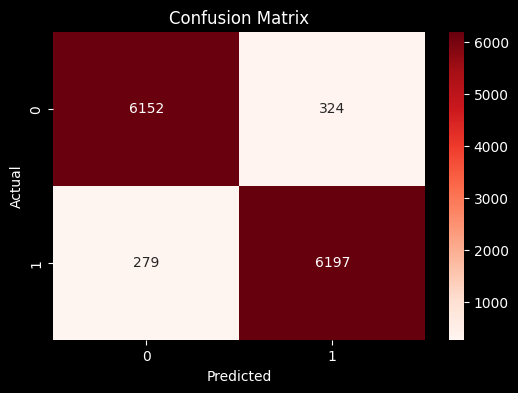

In [11]:
# predict on test set
y_predRF = model.predict(X_test)

# test accuracy
test_accuracy = accuracy_score(y_test, y_predRF)
print("\nTest Accuracy:", test_accuracy)

# model evaluation
print("Classification Report:\n", classification_report(y_test, y_predRF))
print("ROC AUC Score:",  roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_predRF))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_predRF), annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ROC curve

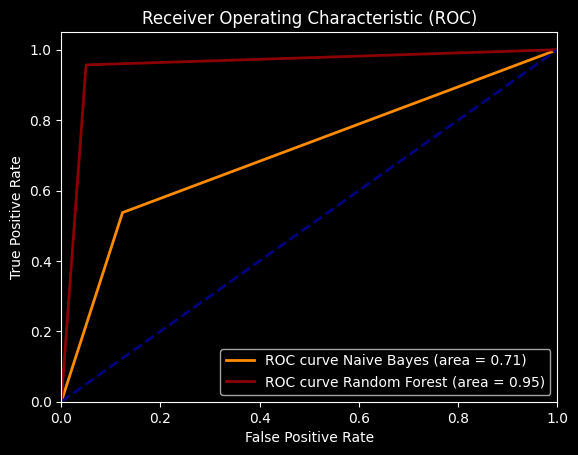

In [12]:
from sklearn.metrics import roc_curve, auc

# compute ROC curve and AUC for the Naive Bayes
fprNB, tprNB, thresholdsNB = roc_curve(y_test, y_predNB)
roc_aucNB = auc(fprNB, tprNB)

# compute ROC curve and AUC for the Random Forest
fprRF, tprRF, thresholdsRF = roc_curve(y_test, y_predRF)
roc_aucRF = auc(fprRF, tprRF)

plt.figure()
plt.plot(fprNB, tprNB, color='darkorange', lw=2, label='ROC curve Naive Bayes (area = %0.2f)' % roc_aucNB)
plt.plot(fprRF, tprRF, color='darkred', lw=2, label='ROC curve Random Forest (area = %0.2f)' % roc_aucRF)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Neural Network

In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [258]:
# create the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [259]:
# compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [260]:
# first split: train and temp
X_train, X_temp, y_train, y_temp = train_test_split(X_balanced, y_balanced, 
                                                    test_size=0.2, 
                                                    stratify=y_balanced, 
                                                    random_state=42)

# second split: test1 and temp2
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, 
                                                      test_size=0.5, 
                                                      stratify=y_temp, 
                                                      random_state=42)

# third split: test2 and validation
X_train2, X_train1, y_train2, y_train1 = train_test_split(X_train, y_train, 
                                                  test_size=0.7, 
                                                  stratify=y_train, 
                                                  random_state=42)

# - X_test, y_test for training (10% of total data)
# - X_train1, y_train1 for first test set (50% of total data)
# - X_train2, y_train2 for second test set (30% of total data)
# - X_val, y_val for validation (10% of total data)

In [261]:
# train the model
history = model.fit(X_train1, y_train1, 
                    epochs=30, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))


Epoch 1/30
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7159 - loss: 0.5591 - val_accuracy: 0.7863 - val_loss: 0.4726
Epoch 2/30
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7913 - loss: 0.4702 - val_accuracy: 0.7864 - val_loss: 0.4586
Epoch 3/30
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8051 - loss: 0.4372 - val_accuracy: 0.8206 - val_loss: 0.4030
Epoch 4/30
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8193 - loss: 0.4116 - val_accuracy: 0.8263 - val_loss: 0.3905
Epoch 5/30
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8318 - loss: 0.3846 - val_accuracy: 0.8334 - val_loss: 0.3758
Epoch 6/30
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8369 - loss: 0.3723 - val_accuracy: 0.8406 - val_loss: 0.3623
Epoch 7/30
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8503 - loss: 0.3483 - val_accuracy: 0.8501 - val_loss: 0.3502
Epoch 8/30
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8532 - loss: 0.3424 - 

In [262]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8873 - loss: 0.2923
Test accuracy: 0.8939160108566284


In [263]:
predictions = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step


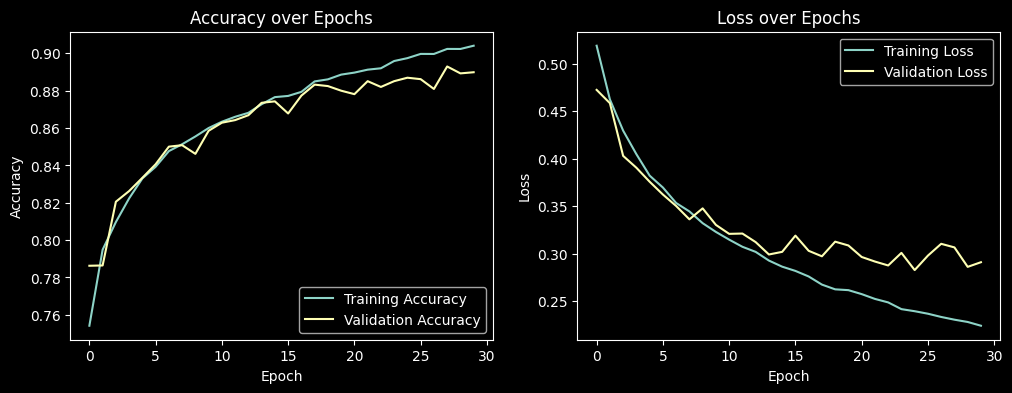

In [264]:

# accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy over Epochs')

# loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss over Epochs')

plt.show()


In [265]:
# save the model
model.save('model.h5')

In [283]:
# load the model
from tensorflow.keras.models import load_model

model = load_model('model.h5')

In [284]:
model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [287]:
history = model.fit(X_train2, y_train2, 
                    epochs=1,
                    batch_size=32, 
                    validation_data=(X_val, y_val))

486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9041 - loss: 0.2359 - val_accuracy: 0.8913 - val_loss: 0.2646


In [286]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.8899 - loss: 0.2634
Test accuracy: 0.8912909030914307
